In [1]:
from torchvision import models
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from PIL import Image 

In [2]:
trainset = torchvision.datasets.CIFAR10(root="./data",
                                         train=True,
                                         download=False)

## Convolutional Layers Pytorch

## Pretrained Models (Resnet)

In [3]:
from torchvision import models
from torchvision import transforms

print(torch.cuda.is_available())

True


In [4]:
model = models.resnet18(pretrained = True)
if torch.cuda.is_available():
    model = model.cuda()
    device = torch.device("cuda")
else:
    model = model.cpu()
    device = torch.device("cpu")

/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Transfer learning 

In [6]:
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

trainset = torchvision.datasets.CIFAR10(root="./data",
                                         train=True,
                                         download=False,
                                         transform = preprocess)

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128)
validset = torchvision.datasets.CIFAR10(root="./data",
                                         train=True,
                                         download=False,
                                         transform = preprocess)
validloader = torch.utils.data.DataLoader(trainset, batch_size = 128)

In [8]:
for paramt in model.parameters():
    paramt.requires_grad= False

In [9]:
model.fc = torch.nn.Linear(512, 10)

In [10]:
loss_f = torch.nn.CrossEntropyLoss()

In [11]:
optimizer = torch.optim.Adam(model.parameters(), 1e-4)
print(device)

cuda


In [12]:

Nepochs = 5
model.train()
model.to(device)
prv_acc = 0
loss_ = []
acc_ = []


for _ in range(Nepochs):
    jlast = 0
    for j, batch in enumerate(trainloader):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_f(outputs, labels)
        loss.backward()
        optimizer.step()
    print(loss)
    loss_.append(loss)
    model.eval()
    with torch.no_grad():
      model.eval()
      correct = 0 
      total = 0
      for j, (images, labels) in enumerate(validloader):
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
      acc = correct / total  
      acc_.append(acc)
      print(f"Accuracy of the network is {acc}")
      if np.abs(prv_acc - acc) < .0001:
          break
      prv_acc = acc    

KeyboardInterrupt: 

<class 'list'>


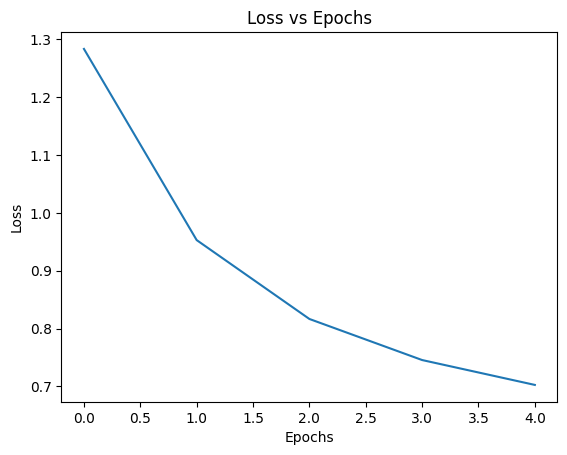

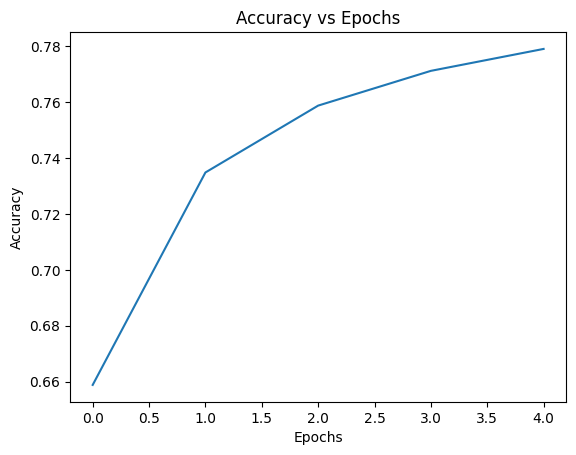

In [ ]:
import matplotlib.pyplot as plt
print(type(loss_))
loss_array = [loss.tolist() for loss in loss_]
range_epochs = range(len(loss_array))
plt.plot(range_epochs, loss_array)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.plot(range_epochs, acc_)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

model.eval()
output = model(images)


In [13]:
for name, param in model.named_parameters():
    if name in [ 'conv1.weight', 'conv1.bias', 'layer1.0.conv1.weight','layer1.0.bn1.weight']:
        param.requires_grad = True

        

In [14]:

Nepochs = 5
model.train()
model.to(device)
prv_acc = 0
loss_ = []
acc_ = []


for i in range(Nepochs):
    jlast = 0
    for j, batch in enumerate(trainloader):
        images, labels = batch
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_f(outputs, labels)
        loss.backward()
        optimizer.step()
    print(loss)
    loss_.append(loss)
    model.eval()
    with torch.no_grad():
      model.eval()
      correct = 0 
      total = 0
      for j, (images, labels) in enumerate(validloader):
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
      acc = correct / total  
      acc_.append(acc)
      print(f"Accuracy of the network is {acc}")
      if np.abs(prv_acc - acc) < .0001:
          break
      prv_acc = acc    
torch.save(model.state_dict(), "model.pt")

tensor(1.0736, device='cuda:0', grad_fn=<NllLossBackward0>)
Accuracy of the network is 0.74728
tensor(0.6327, device='cuda:0', grad_fn=<NllLossBackward0>)
Accuracy of the network is 0.83438
tensor(0.5272, device='cuda:0', grad_fn=<NllLossBackward0>)
Accuracy of the network is 0.8578
tensor(0.4879, device='cuda:0', grad_fn=<NllLossBackward0>)
Accuracy of the network is 0.86978
tensor(0.4363, device='cuda:0', grad_fn=<NllLossBackward0>)
Accuracy of the network is 0.8761


<class 'list'>


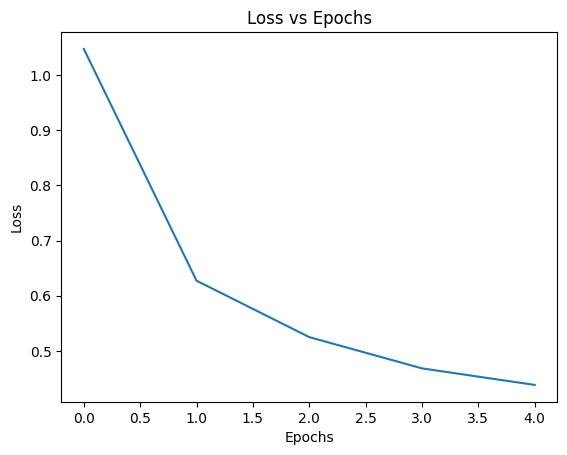

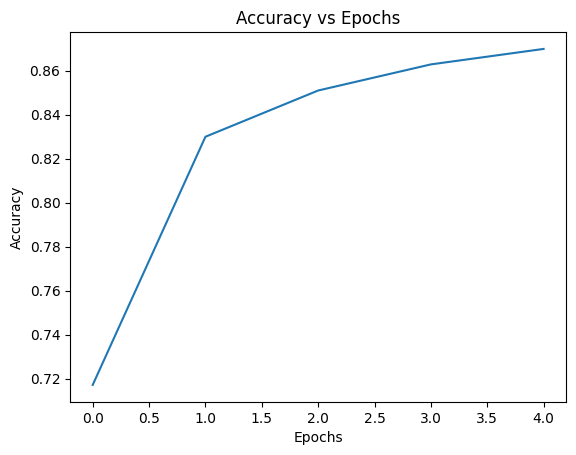

In [ ]:

print(type(loss_))
loss_array = [loss.tolist() for loss in loss_]
range_epochs = range(len(loss_array))
plt.plot(range_epochs, loss_array)
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.plot(range_epochs, acc_)
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

model.eval()
output = model(images)


/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


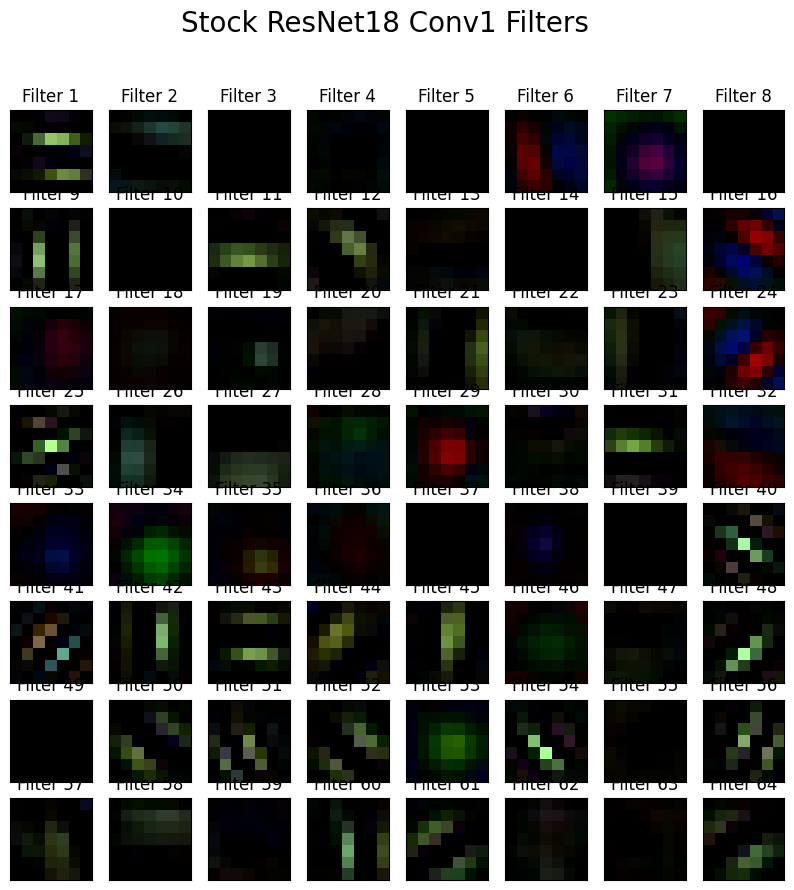

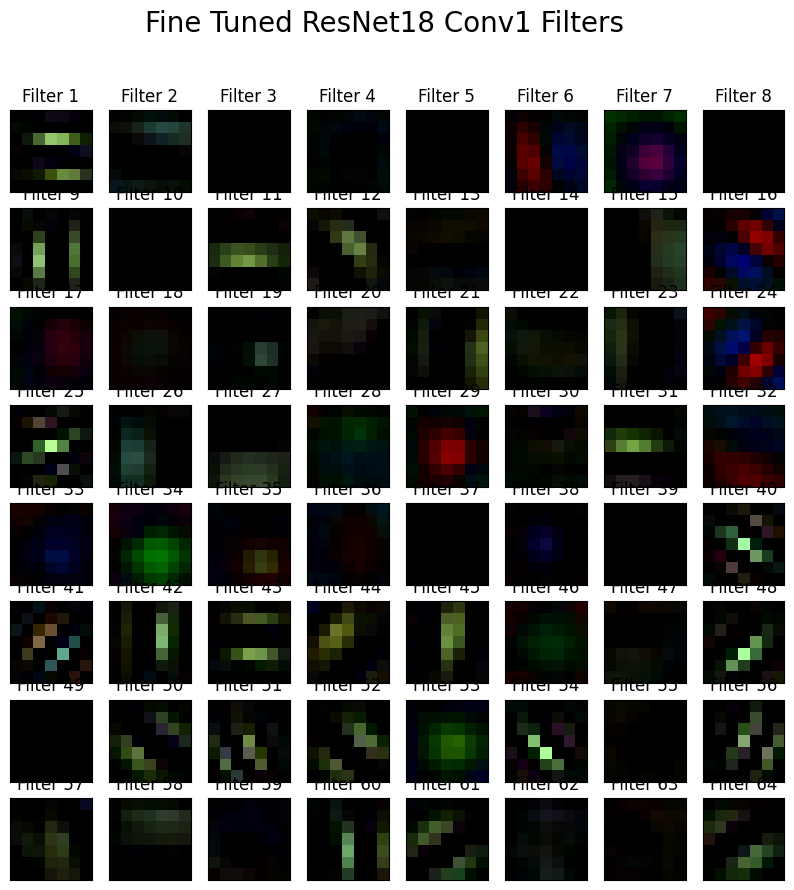

In [16]:
ogmodel = models.resnet18(pretrained = True)
conv1_filters = ogmodel.conv1.weight.detach().cpu().clone()
conv1_filters = conv1_filters.permute(0,2,3,1).numpy()
conv1_filters_finetuned = model.conv1.weight.detach().cpu().clone()
conv1_filters_finetuned = conv1_filters_finetuned.permute(0,2,3,1).numpy()

def plot_filters(filters, title):
    plt.figure(figsize=(10, 10))
    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(filters[i].clip(0,1))
        plt.xticks([])
        plt.yticks([])
        plt.title(f'Filter {i+1}')
    plt.suptitle(title, fontsize=20)

plot_filters(conv1_filters, "Stock ResNet18 Conv1 Filters")
plot_filters(conv1_filters_finetuned, "Fine Tuned ResNet18 Conv1 Filters")

/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_3178/3629211239.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

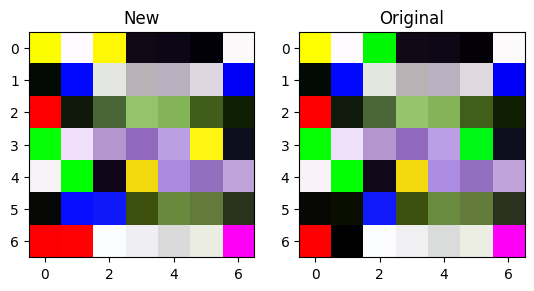

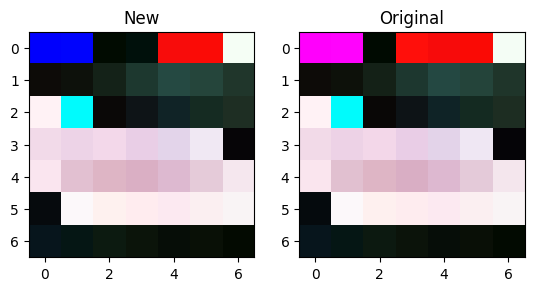

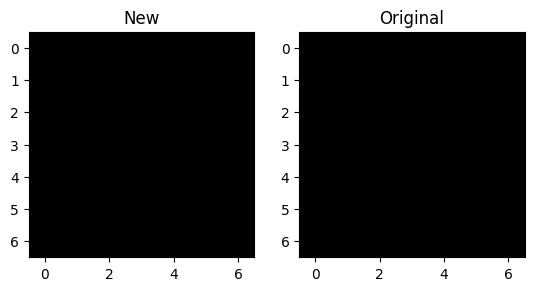

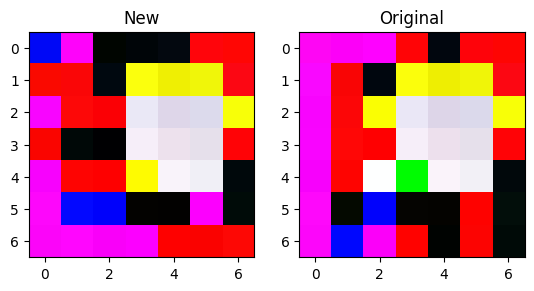

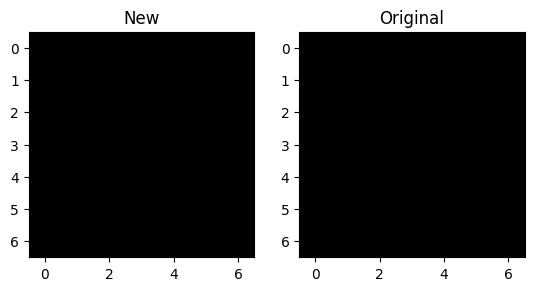

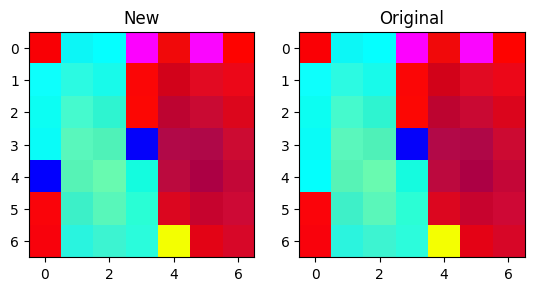

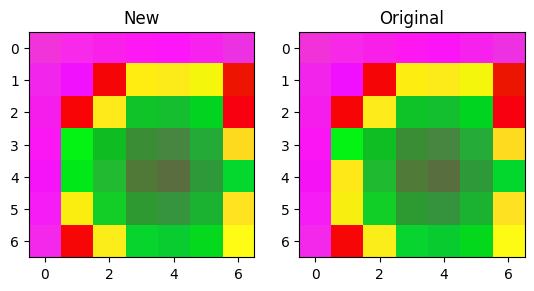

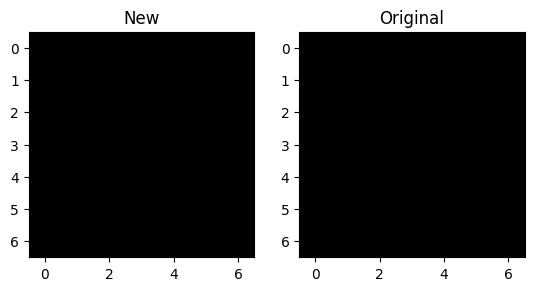

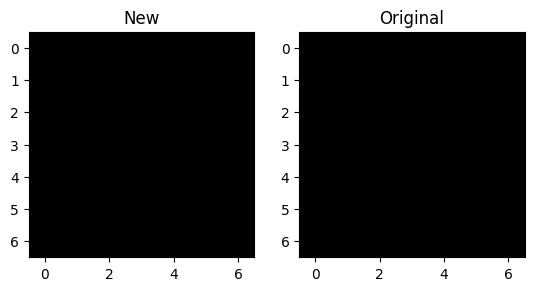

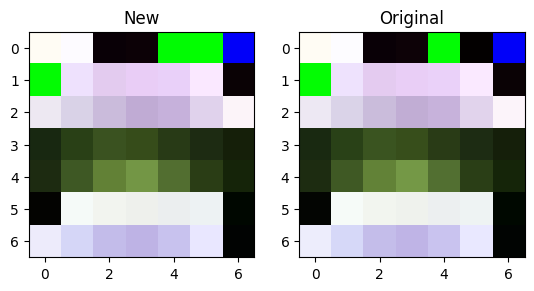

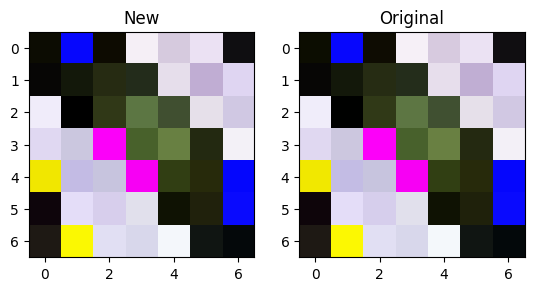

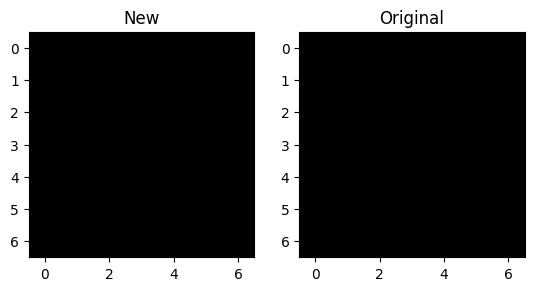

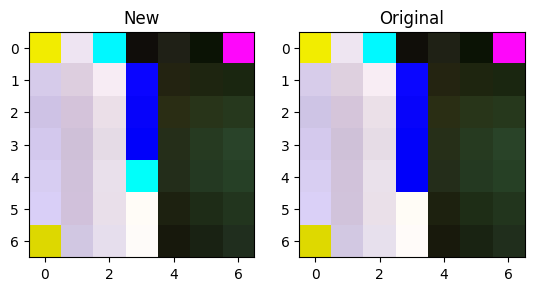

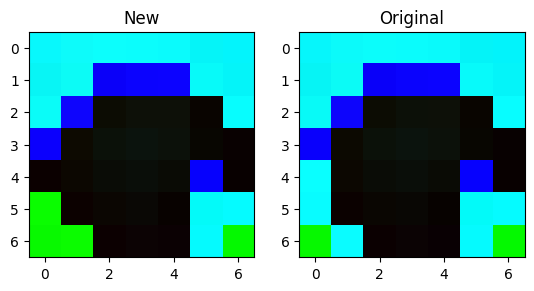

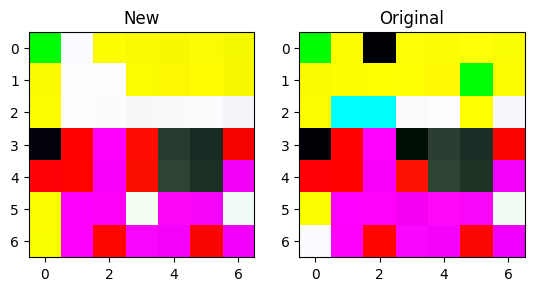

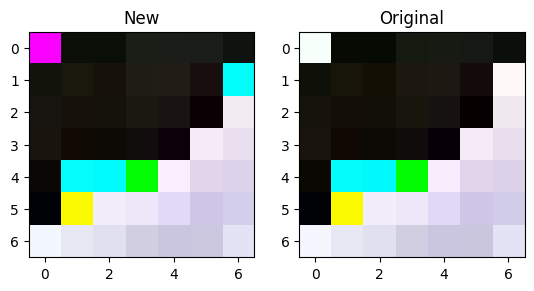

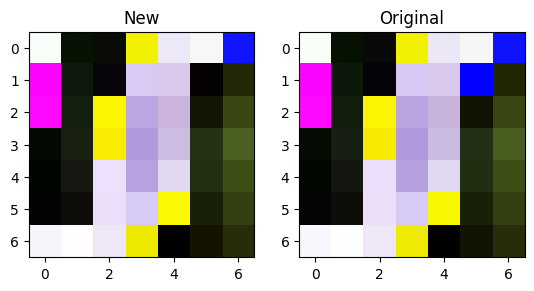

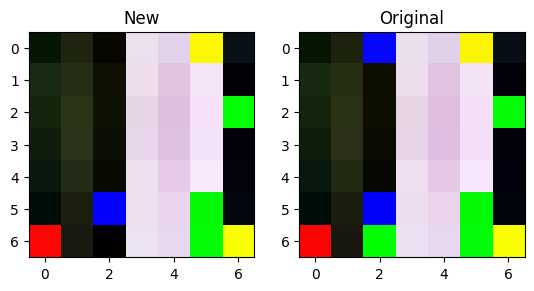

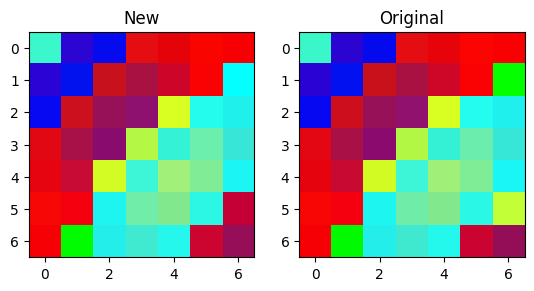

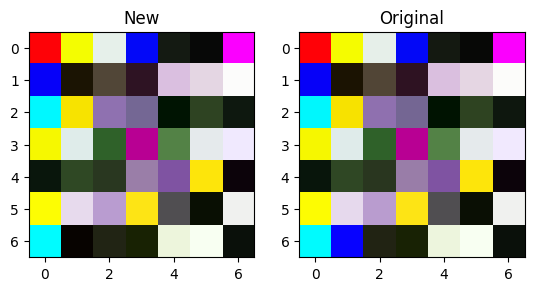

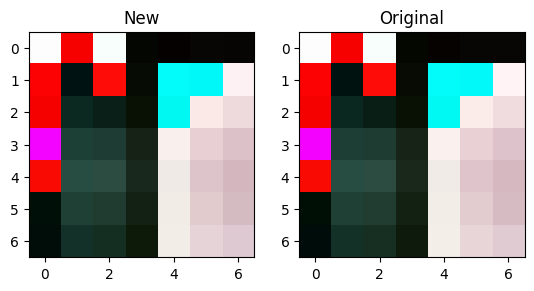

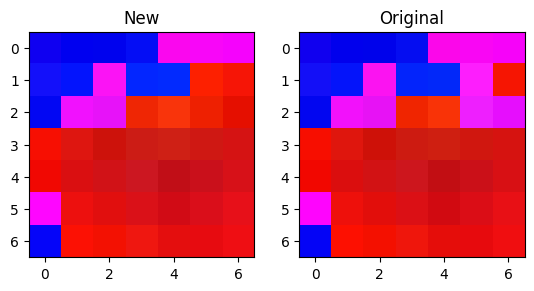

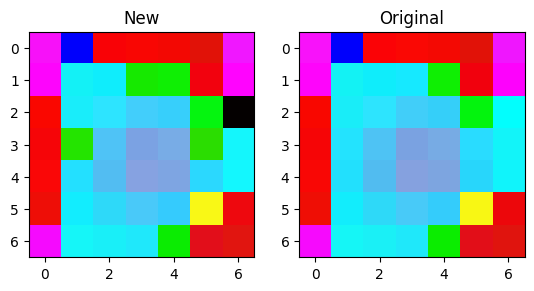

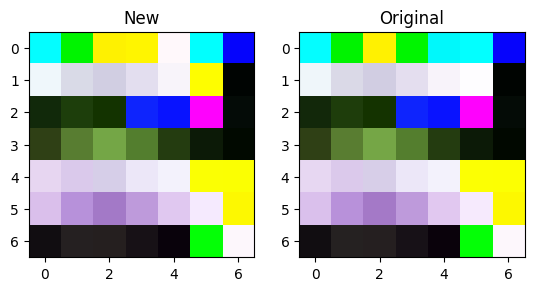

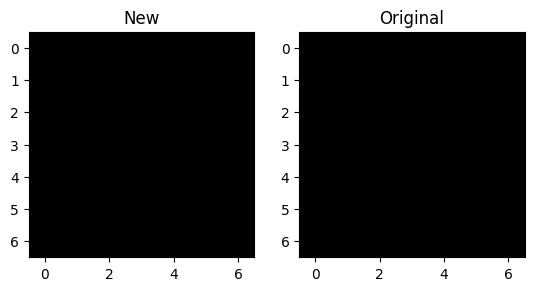

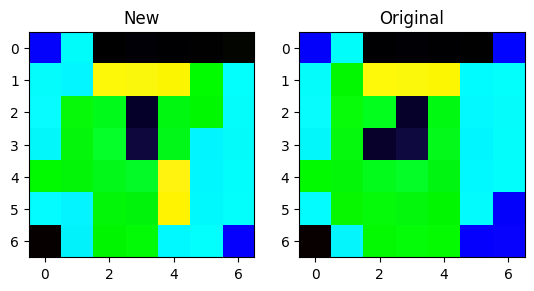

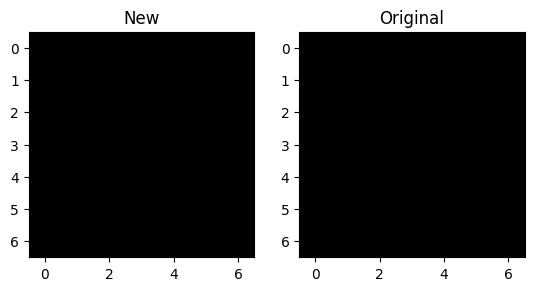

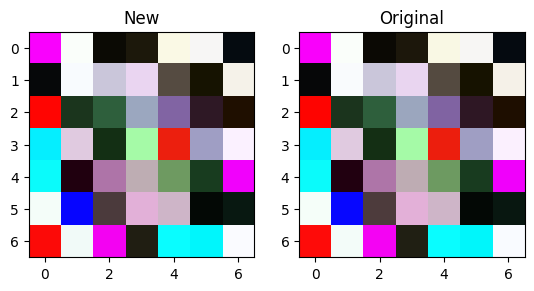

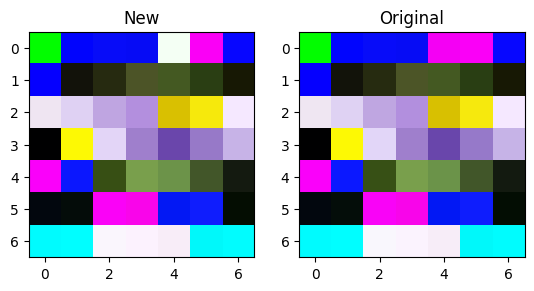

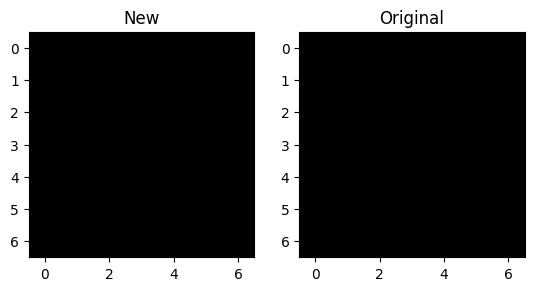

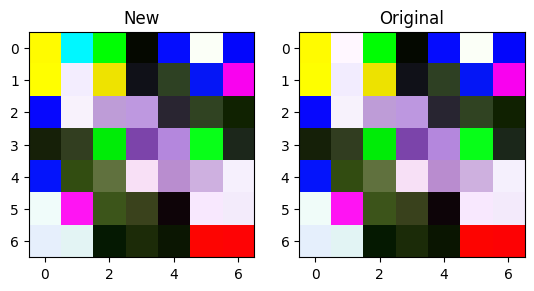

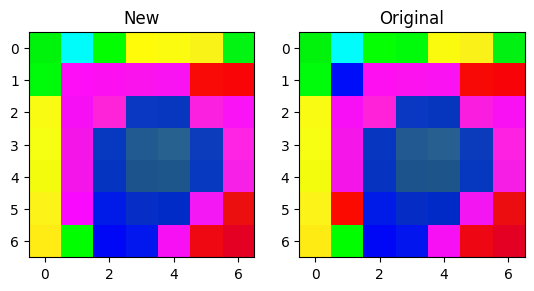

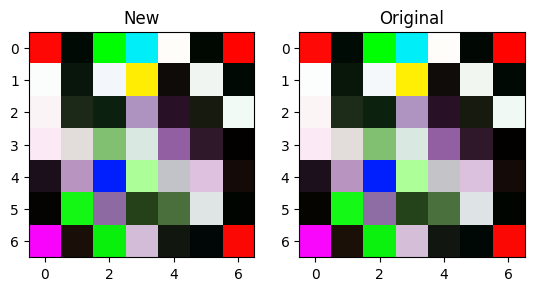

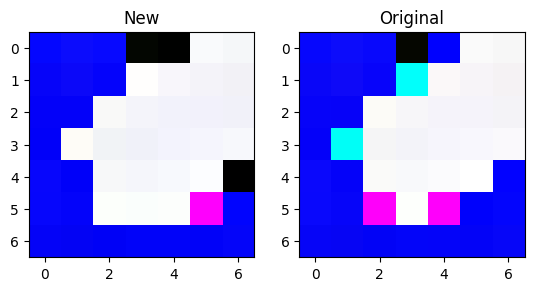

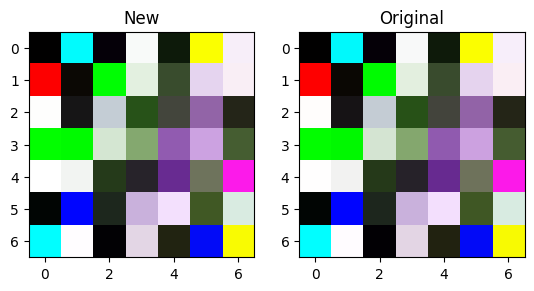

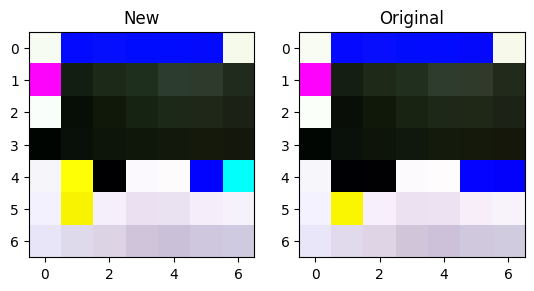

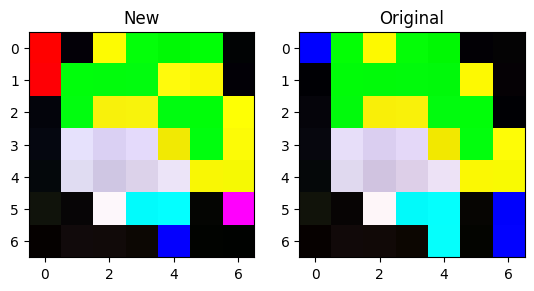

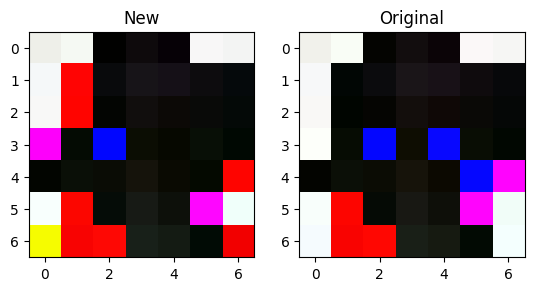

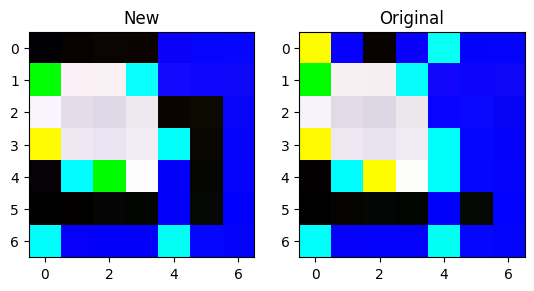

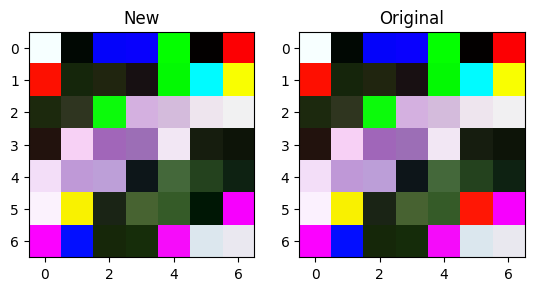

In [ ]:
ogmodel = models.resnet18(pretrained = True)
num_weights = model.get_parameter("conv1.weight").shape[0]
for i in range(model.get_parameter("conv1.weight").shape[0]):
    fig, ax = plt.subplots(1, 2)
    ax[0].set_title("New")
    image =  model.get_parameter("conv1.weight")[i].detach().cpu()
    image = transforms.ToPILImage()(image)
    ax[0].imshow(image)
    image = transforms.ToPILImage()( ogmodel.get_parameter("conv1.weight")[i].detach().cpu())
    ax[1].imshow(image)
    ax[1].set_title("Original")
    plt.savefig(f"conv{i}.png")